In [1]:
import pandas as pd
import numpy as np
import warnings
## Building Model
from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
df = pd.read_csv('./DataSet/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Comparison of target=0 VS target=1

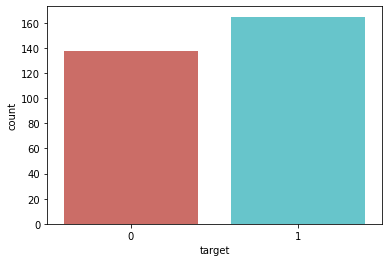

In [3]:
sns.countplot(x='target',data=df,palette='hls')
plt.show()

#### Checking Distribution column-wise

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'oldpeak'}>, <AxesSubplot:>]],
      dtype=object)

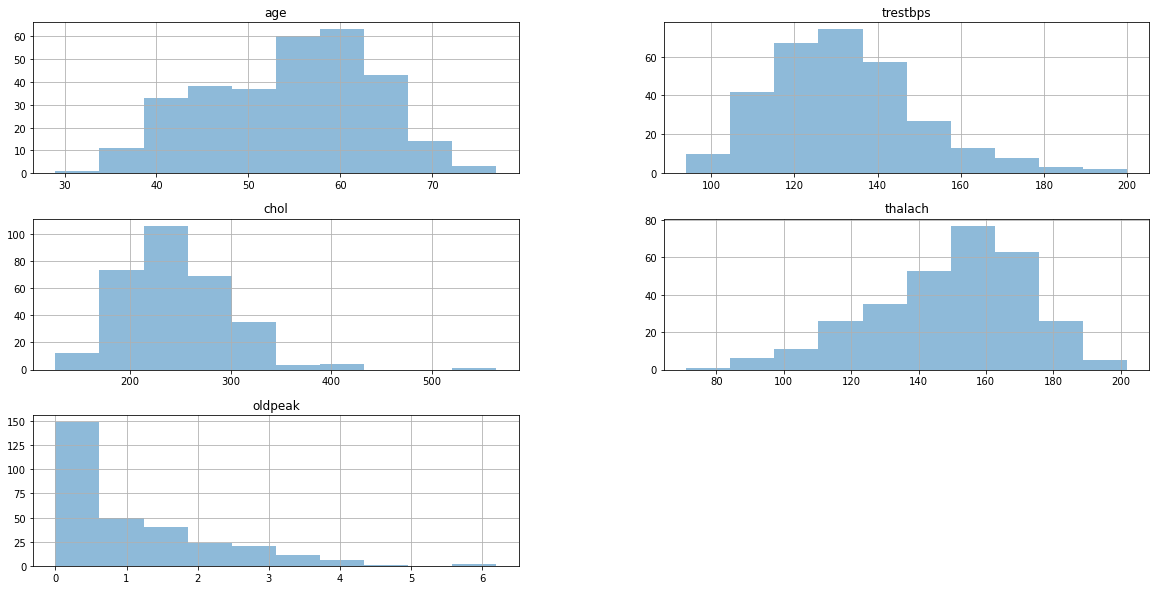

In [4]:
df.hist(column=['age','trestbps','chol','thalach','oldpeak'],alpha=0.5,figsize=(20,10))

array([[<AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'fbs'}>],
       [<AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'slope'}>],
       [<AxesSubplot:title={'center':'ca'}>,
        <AxesSubplot:title={'center':'thal'}>, <AxesSubplot:>]],
      dtype=object)

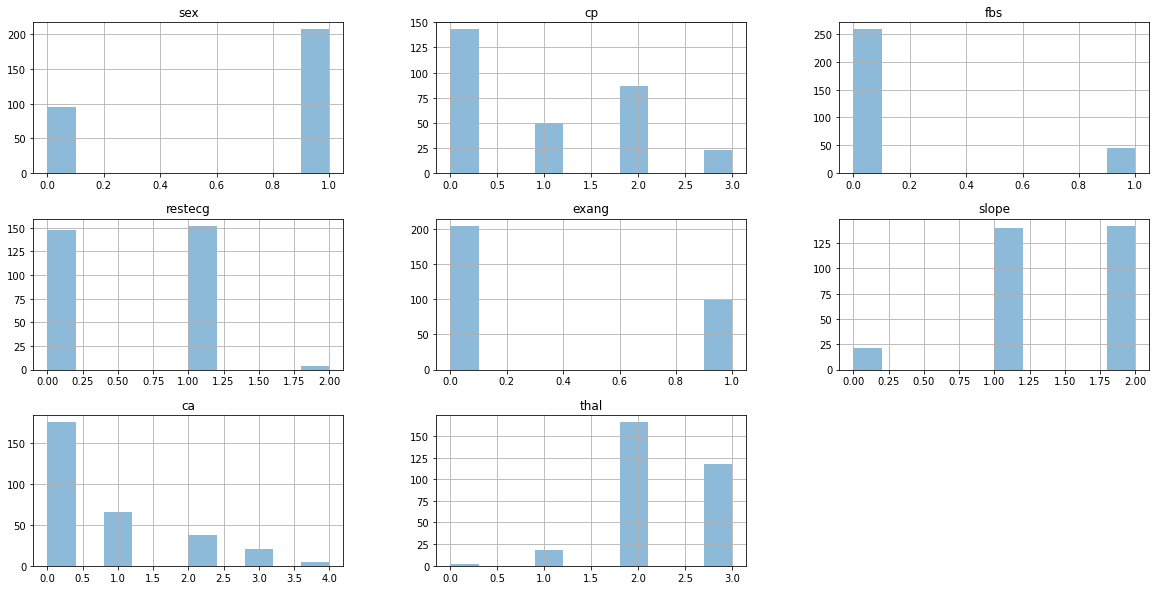

In [5]:
df.hist(column=['sex','cp','fbs','restecg','exang','slope','ca','thal'],alpha=0.5,figsize=(20,10))

## Machine Learning Algorithm: Multiple Linear Regression
#### General Equation: $Y$ = $β_0 + β_1x_1 + β_2x_2 + .... + β_kx_k + ε$

#### Splitting Data-Frame to Test & Train dataframes

In [6]:
heart_X = df.drop('target',axis=1)
heart_Y = df['target']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(heart_X, heart_Y, test_size=0.2, random_state=42)

#### Model Building

In [8]:
X = x_train.to_numpy()
Y = y_train.to_numpy()

#### Normal Equation:                      $X'X\hat{β}$ = $X'Y$
#### Least Square Estimate of β :           $\hat{β}$ = $(X'X)^{-1} X'Y$

In [9]:
def cal_beta(X,Y):
    trans_X = X.transpose()
    mul1 = np.matmul(trans_X,X)
    mul2 = np.matmul(trans_X,Y)
    inv_mul1 = np.linalg.inv(mul1)
    
    return np.matmul(inv_mul1,mul2)

In [10]:
beta = cal_beta(X,Y)
print('The dimension of beta: {}'.format(beta.shape))

The dimension of beta: (13,)


#### Fitted Regression Model:  $\hat{y_i}$ = $\hat{β_0} + \sum_{j=1}^{k} \hat{β_j}x_{ij}$ , where we have $\hat{β_0},...,\hat{β_{12}}$

#### In Matrix notation, the fitted Model is:     $\hat{y}$ = $X\hat{β}$

In [11]:
for i in range(0,beta.shape[0]):
    print('β{} = {}'.format(i,beta[i]))

β0 = 0.0034486433063454502
β1 = -0.1682297991385454
β2 = 0.10418115807100636
β3 = -0.0005843663520501419
β4 = -7.27683022132275e-05
β5 = 0.006737830979235304
β6 = 0.07188023575358804
β7 = 0.004494824320227714
β8 = -0.14501397230172192
β9 = -0.05715627708486645
β10 = 0.11853541044958016
β11 = -0.11234597630855184
β12 = -0.10645747854966503


In [12]:
def predict(b,x):
    return np.matmul(x,b)

y_pred = predict(beta,x_test.to_numpy())

y_pred

array([ 0.14444841,  0.72989287,  0.79002525,  0.08014047,  0.87252697,
        0.92351065,  0.50413212, -0.25786052, -0.19969343,  0.46282194,
        0.65888972,  0.3164397 ,  0.87922178, -0.05447025,  1.05576143,
        0.92618522,  1.05623143,  0.12078613, -0.17619953, -0.0462337 ,
        0.71073314, -0.15779854,  0.21493619,  0.81020337,  0.79127412,
        0.66780674,  0.82042817,  0.62202641, -0.1200428 ,  0.82850165,
        0.03275498,  0.11729038, -0.20052342,  0.16542089,  0.65882227,
        0.22212134,  0.64646335,  0.77932628,  0.75059182,  0.75653562,
        0.52886959,  0.72970155,  0.72000164,  0.63642524,  0.76561287,
       -0.26650109,  0.61763185,  0.95538602,  0.22962278,  0.05474446,
        0.13166271, -0.14065603,  0.66095929,  1.03539724,  0.39853662,
       -0.25064649,  0.18185131,  0.9516113 ,  0.06061288, -0.15888046,
        0.12475888])

In [13]:
for i in range(0,y_pred.shape[0]):
    if 0.5<y_pred[i] and y_pred[i]<1.5:
        y_pred[i] = 1
    elif -0.5<y_pred[i] and y_pred[i]<=0.5:
        y_pred[i] = 0

y_pred

array([0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0.])

In [14]:
y_test.to_numpy()

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [15]:
score = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test,y_pred)
print('R2 Score = {}'.format(score))
print('Mean Squared Error = {}'.format(MSE))

R2 Score = 0.47413793103448276
Mean Squared Error = 0.13114754098360656
